# Credit card fraud detection using: Logistic Regression, Support Vector Machine, Gaussian Naive Baes and Gradient Boosting

In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv("creditcard_2023.csv")
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [4]:
df.shape

(568630, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data analysis

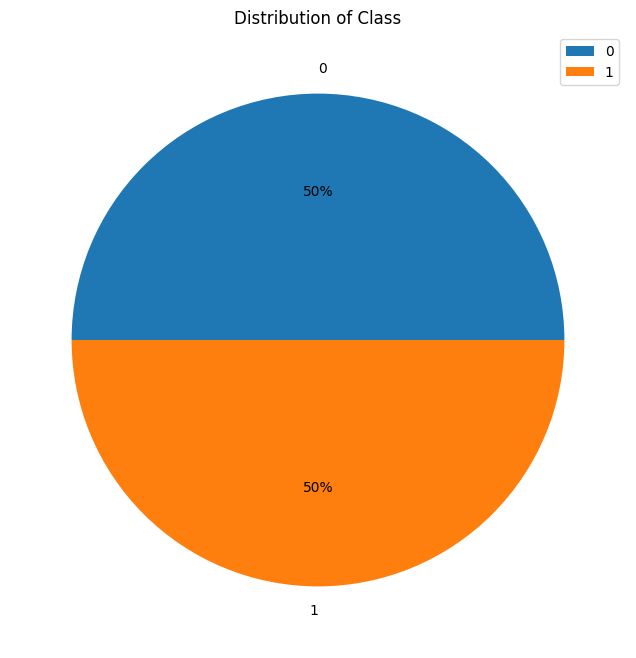

In [12]:
plt.figure(figsize=(10,8))

class_counts = df['Class'].value_counts()

plt.pie(class_counts, labels=class_counts.index, autopct='%1.f%%')
plt.title('Distribution of Class')
plt.legend()
plt.show()

In [13]:
X = df.drop(['Class'], axis= "columns")
y = df['Class']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =543 )

In [16]:
X_train.shape

(398041, 30)

In [17]:
X_test.shape

(170589, 30)

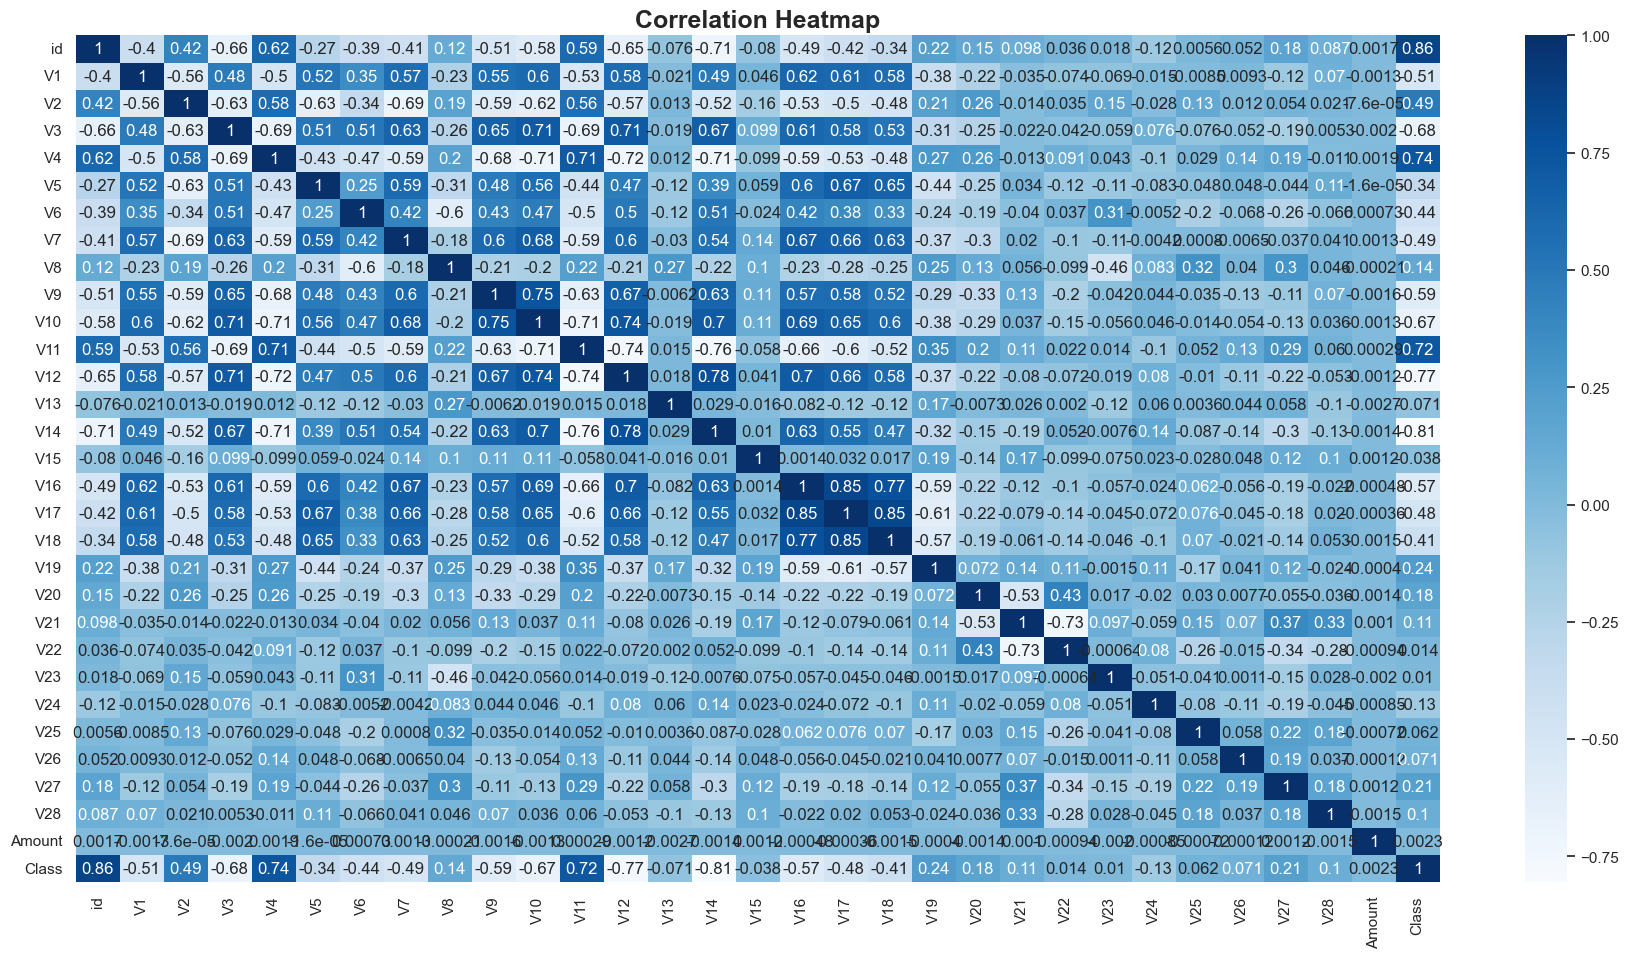

In [18]:
sns.set_theme()
plt.rcParams['figure.figsize']= (22,11)
plt.title("Correlation Heatmap",fontsize=18, weight= 'bold')
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

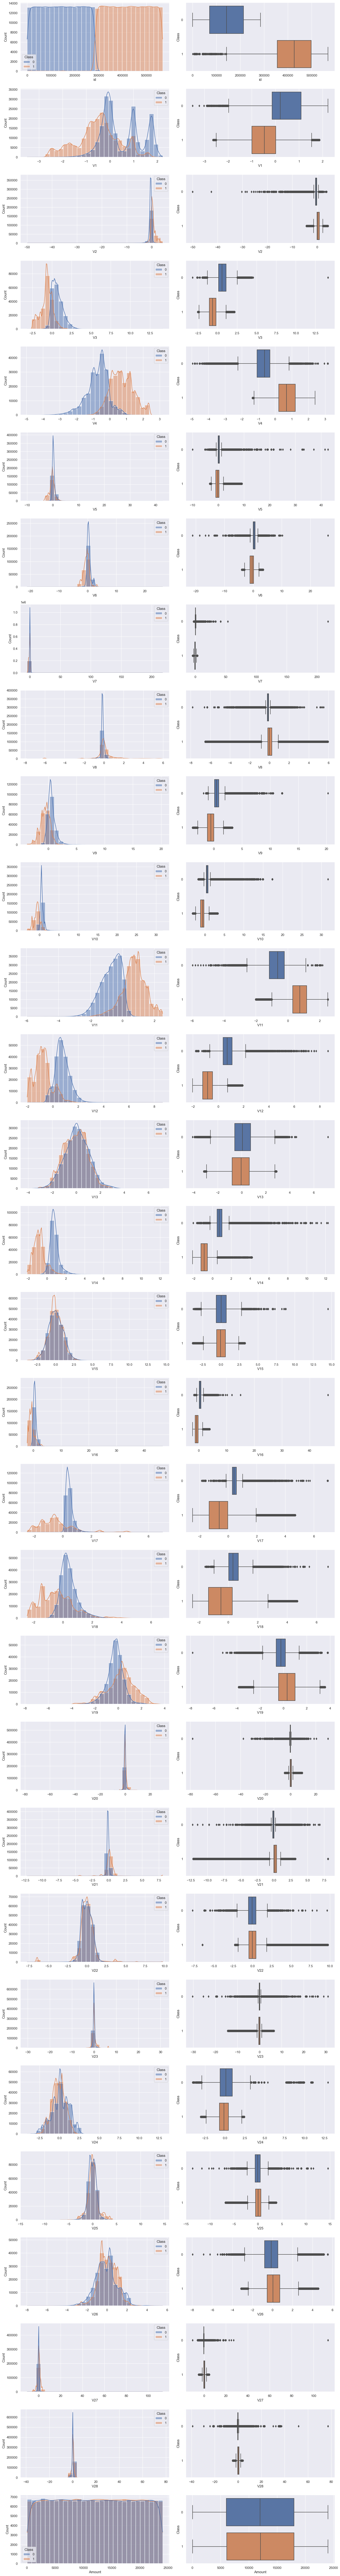

In [28]:
fig, axes = plt.subplots(X_train.shape[1], 2, figsize = (16, 4 * X_train.shape[1]))
for i in range(X_train.shape[1]):
    x = X_train.iloc[:, i]
    sns.histplot(x = x, bins = 30, kde = True, hue = y_train, ax = axes[i, 0])
    sns.boxplot(x = x, y = y_train, orient = 'h', ax = axes[i, 1])
fig.tight_layout();

plt.savefig('output_plot.png')

## Data scaling

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
m_scaler = MinMaxScaler()
s_scaler = StandardScaler()

# MinMaxScaler 
X_train_minmax = m_scaler.fit_transform(X_train)
X_test_minmax = m_scaler.transform(X_test)

# StandardScaler features
X_train_standard = s_scaler.fit_transform(X_train)
X_test_standard = s_scaler.transform(X_test)

## Model training

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
def train_models():
    # Initialize models
    models = {
        'LogisticRegression': LogisticRegression(),
        'RandomForest': RandomForestClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'SVM': SVC(),
        'GaussianNB': GaussianNB()
    }

    results = {}

    for scaling_method, X_train_scaled, X_test_scaled in [('Unscaled', X_train, X_test),
                                                         ('MinMax_Scaled', X_train_minmax, X_test_minmax),
                                                         ('Standard_Scaled', X_train_standard, X_test_standard)]:
        model_results = {}
        for name, model in models.items():
            # Train model
            model.fit(X_train_scaled, y_train)

            # Make predictions
            predictions = model.predict(X_test_scaled)

            # Store predictions
            model_results[name] = {
                'Predictions': predictions,
                'Confusion_Matrix': confusion_matrix(y_test, predictions),
                'Classification_Report': classification_report(y_test, predictions, digits=4)
            }

        results[scaling_method] = model_results

    return results

In [112]:
results = train_models()
results

C:\Users\Al-ameen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Unscaled': {'LogisticRegression': {'Predictions': array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
   'Confusion_Matrix': array([[56876, 28511],
          [ 7060, 78142]], dtype=int64),
   'Classification_Report': '              precision    recall  f1-score   support\n\n           0     0.8896    0.6661    0.7618     85387\n           1     0.7327    0.9171    0.8146     85202\n\n    accuracy                         0.7915    170589\n   macro avg     0.8111    0.7916    0.7882    170589\nweighted avg     0.8112    0.7915    0.7882    170589\n'},
  'RandomForest': {'Predictions': array([0, 0, 1, ..., 1, 0, 1], dtype=int64),
   'Confusion_Matrix': array([[85383,     4],
          [   34, 85168]], dtype=int64),
   'Classification_Report': '              precision    recall  f1-score   support\n\n           0     0.9996    1.0000    0.9998     85387\n           1     1.0000    0.9996    0.9998     85202\n\n    accuracy                         0.9998    170589\n   macro avg     0.9998    0.9

In [55]:
def plot_confusion_matrix_for_model(results, scaling_key, model_name, color = 'Blues'):
    model_results = results[scaling_key][model_name]
    predictions = model_results['Predictions']
    true_labels = y_test  

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predictions)

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap=color, xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f"Confusion Matrix - {model_name} ({scaling_key} Scaling)")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Plotting the confusion matrix for the unscaled data

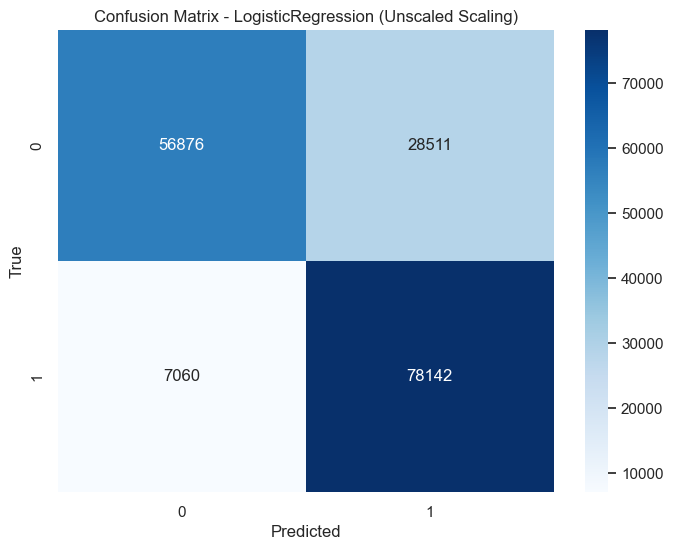

In [56]:
plot_confusion_matrix_for_model(results, 'Unscaled', 'LogisticRegression')

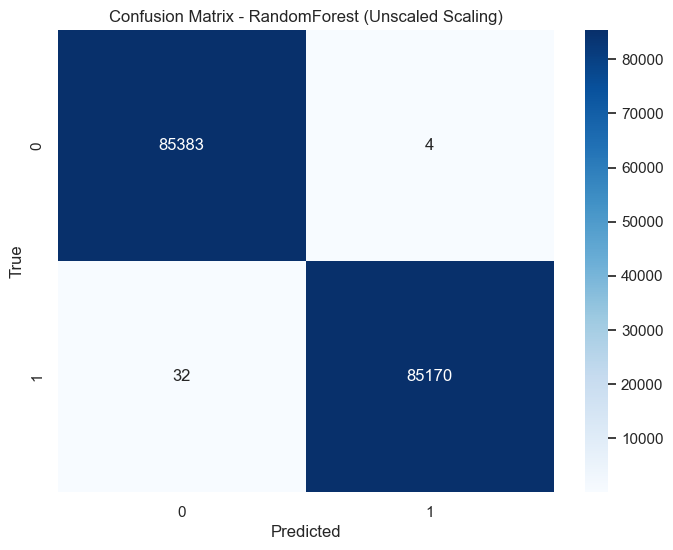

In [51]:
plot_confusion_matrix_for_model(results, 'Unscaled', 'RandomForest')

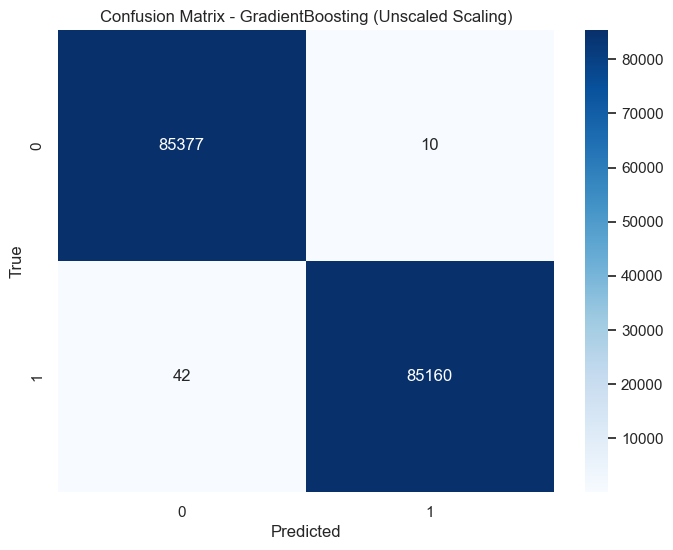

In [52]:
plot_confusion_matrix_for_model(results, 'Unscaled', 'GradientBoosting')

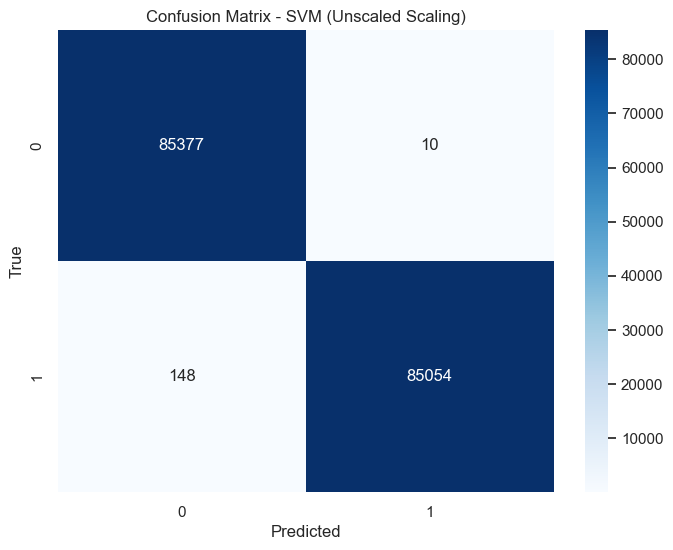

In [53]:
plot_confusion_matrix_for_model(results, 'Unscaled', 'SVM')

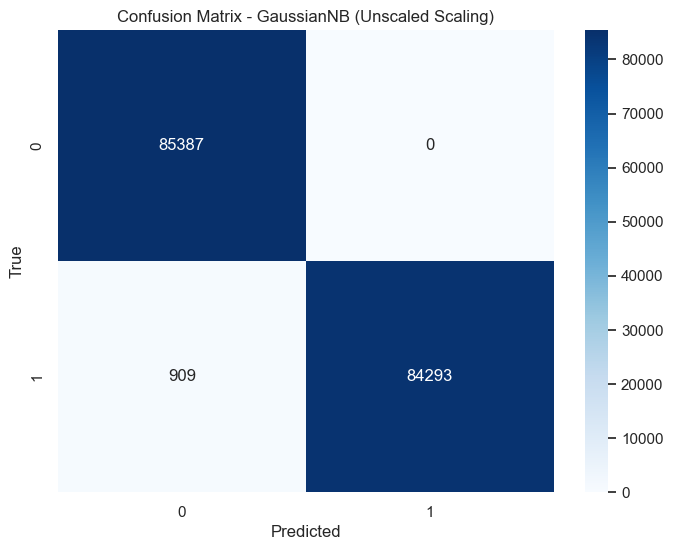

In [54]:
plot_confusion_matrix_for_model(results, 'Unscaled', 'GaussianNB')

## Plotting the confusion matrix for the min max scaled data

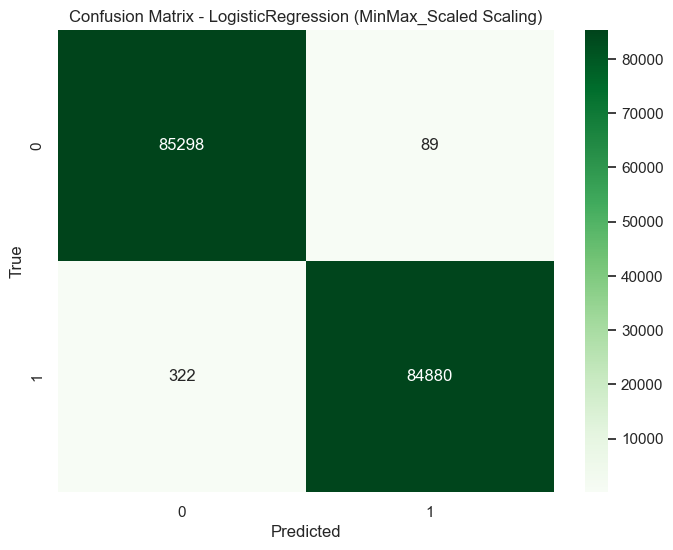

In [59]:
plot_confusion_matrix_for_model(results, 'MinMax_Scaled', 'LogisticRegression', color='Greens')

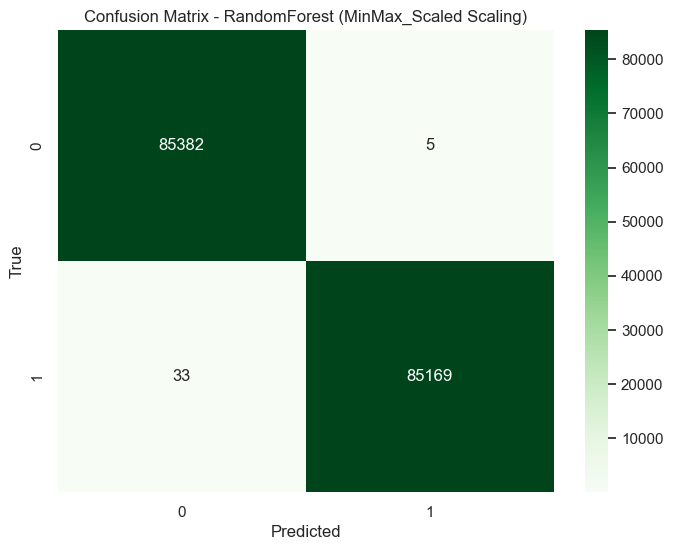

In [60]:
plot_confusion_matrix_for_model(results, 'MinMax_Scaled', 'RandomForest', color='Greens')

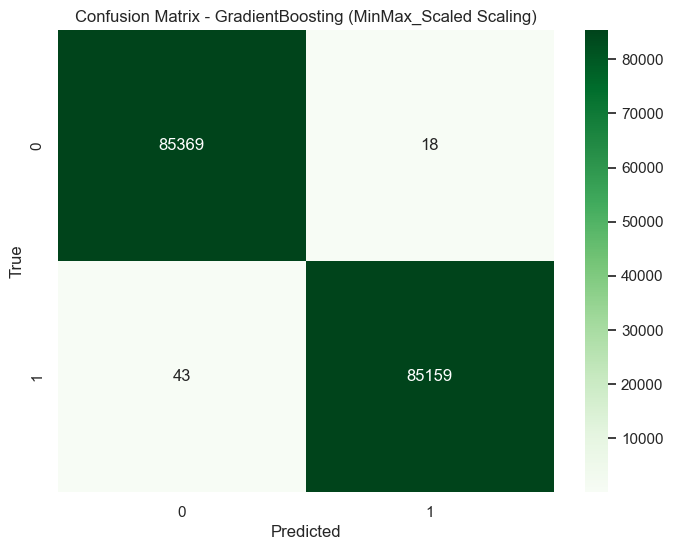

In [62]:
plot_confusion_matrix_for_model(results, 'MinMax_Scaled', 'GradientBoosting', color='Greens')

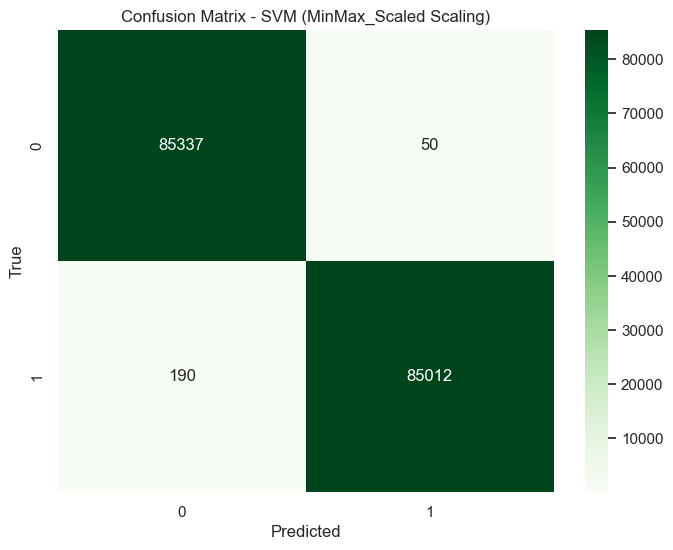

In [64]:
plot_confusion_matrix_for_model(results, 'MinMax_Scaled', 'SVM', color='Greens')

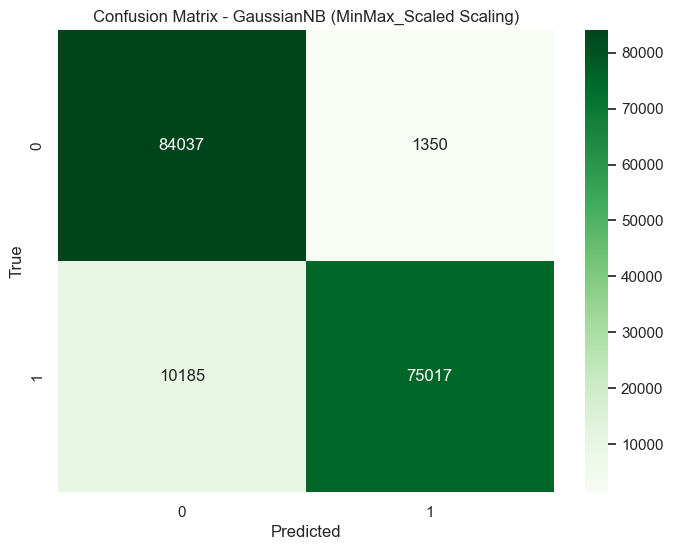

In [65]:
plot_confusion_matrix_for_model(results, 'MinMax_Scaled', 'GaussianNB', color='Greens')

## Plotting the confusion matrix for the standard scaled data


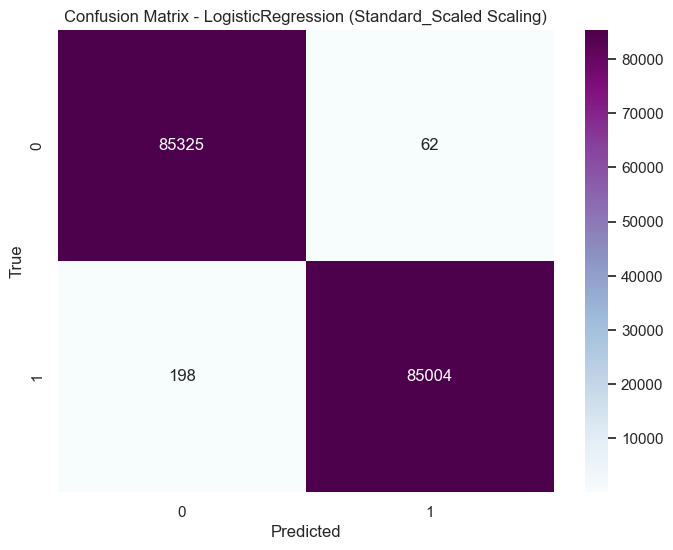

In [71]:
plot_confusion_matrix_for_model(results, 'Standard_Scaled', 'LogisticRegression', color='BuPu')

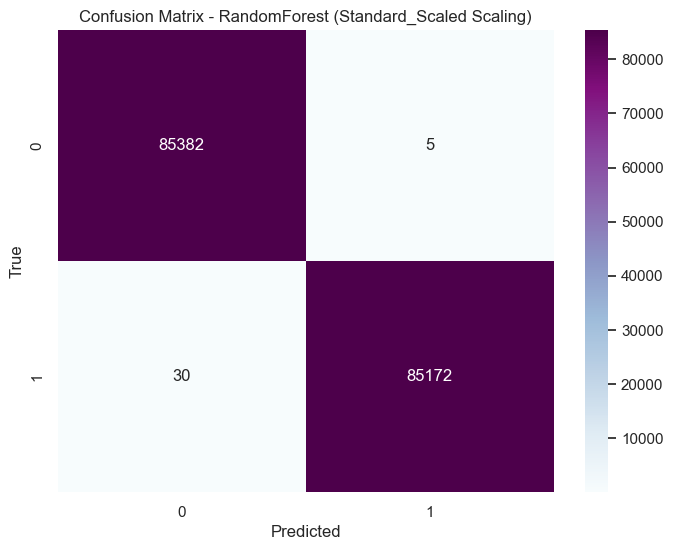

In [72]:
plot_confusion_matrix_for_model(results, 'Standard_Scaled', 'RandomForest', color='BuPu')

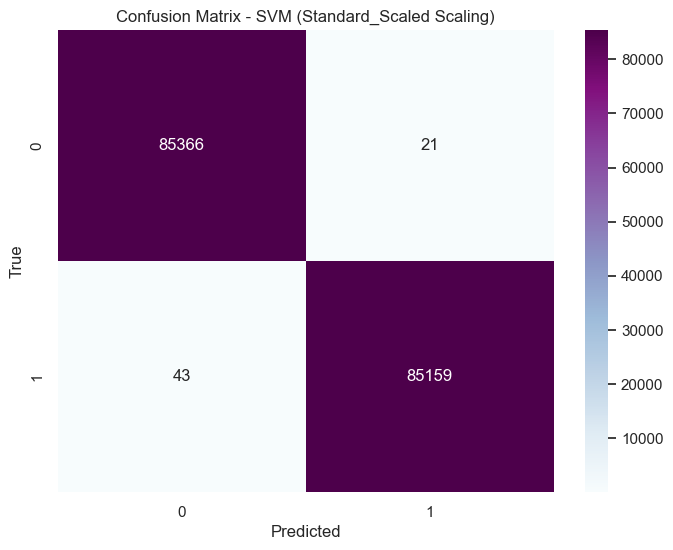

In [73]:
plot_confusion_matrix_for_model(results, 'Standard_Scaled', 'SVM', color='BuPu')

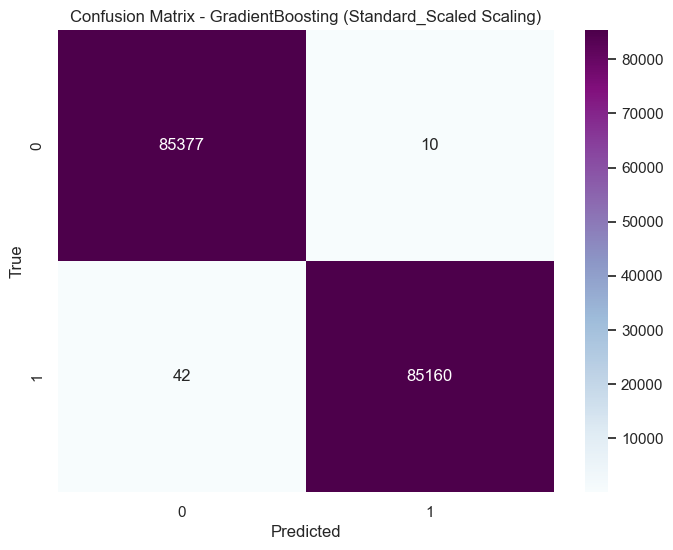

In [74]:
plot_confusion_matrix_for_model(results, 'Standard_Scaled', 'GradientBoosting', color='BuPu')

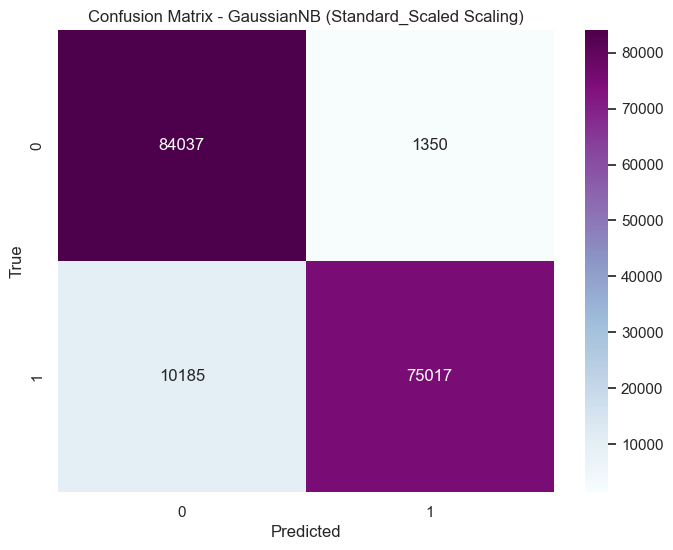

In [75]:
plot_confusion_matrix_for_model(results, 'Standard_Scaled', 'GaussianNB', color='BuPu')

In [123]:
def extract_metrics(results):
    for scaling_key, scaling_values in results.items():
        for model_name, model_results in scaling_values.items():
            print(f"Scaling: {scaling_key}, Model: {model_name}")
            
            classification_report_str = model_results['Classification_Report']
            print(classification_report_str)
            
extract_metrics(results)

Scaling: Unscaled, Model: LogisticRegression
              precision    recall  f1-score   support

           0     0.8896    0.6661    0.7618     85387
           1     0.7327    0.9171    0.8146     85202

    accuracy                         0.7915    170589
   macro avg     0.8111    0.7916    0.7882    170589
weighted avg     0.8112    0.7915    0.7882    170589

Scaling: Unscaled, Model: RandomForest
              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     85387
           1     1.0000    0.9996    0.9998     85202

    accuracy                         0.9998    170589
   macro avg     0.9998    0.9998    0.9998    170589
weighted avg     0.9998    0.9998    0.9998    170589

Scaling: Unscaled, Model: GradientBoosting
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     85387
           1     0.9999    0.9995    0.9997     85202

    accuracy                         0.9997    170589
 

In [126]:
import re

In [140]:
input_text = """"
          Scaling: Unscaled, Model: LogisticRegression
              precision    recall  f1-score   support

           0     0.8896    0.6661    0.7618     85387
           1     0.7327    0.9171    0.8146     85202

    accuracy                         0.7915    170589
   macro avg     0.8111    0.7916    0.7882    170589
weighted avg     0.8112    0.7915    0.7882    170589

Scaling: Unscaled, Model: RandomForest
              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     85387
           1     1.0000    0.9996    0.9998     85202

    accuracy                         0.9998    170589
   macro avg     0.9998    0.9998    0.9998    170589
weighted avg     0.9998    0.9998    0.9998    170589

Scaling: Unscaled, Model: GradientBoosting
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     85387
           1     0.9999    0.9995    0.9997     85202

    accuracy                         0.9997    170589
   macro avg     0.9997    0.9997    0.9997    170589
weighted avg     0.9997    0.9997    0.9997    170589

Scaling: Unscaled, Model: SVM
              precision    recall  f1-score   support

           0     0.9983    0.9999    0.9991     85387
           1     0.9999    0.9983    0.9991     85202

    accuracy                         0.9991    170589
   macro avg     0.9991    0.9991    0.9991    170589
weighted avg     0.9991    0.9991    0.9991    170589

Scaling: Unscaled, Model: GaussianNB
              precision    recall  f1-score   support

           0     0.9895    1.0000    0.9947     85387
           1     1.0000    0.9893    0.9946     85202

    accuracy                         0.9947    170589
   macro avg     0.9947    0.9947    0.9947    170589
weighted avg     0.9947    0.9947    0.9947    170589

Scaling: MinMax_Scaled, Model: LogisticRegression
              precision    recall  f1-score   support

           0     0.9962    0.9990    0.9976     85387
           1     0.9990    0.9962    0.9976     85202

    accuracy                         0.9976    170589
   macro avg     0.9976    0.9976    0.9976    170589
weighted avg     0.9976    0.9976    0.9976    170589

Scaling: MinMax_Scaled, Model: RandomForest
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     85387
           1     0.9999    0.9996    0.9998     85202

    accuracy                         0.9998    170589
   macro avg     0.9998    0.9998    0.9998    170589
weighted avg     0.9998    0.9998    0.9998    170589

Scaling: MinMax_Scaled, Model: GradientBoosting
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996     85387
           1     0.9998    0.9995    0.9996     85202

    accuracy                         0.9996    170589
   macro avg     0.9996    0.9996    0.9996    170589
weighted avg     0.9996    0.9996    0.9996    170589

Scaling: MinMax_Scaled, Model: SVM
              precision    recall  f1-score   support

           0     0.9978    0.9994    0.9986     85387
           1     0.9994    0.9978    0.9986     85202

    accuracy                         0.9986    170589
   macro avg     0.9986    0.9986    0.9986    170589
weighted avg     0.9986    0.9986    0.9986    170589

Scaling: MinMax_Scaled, Model: GaussianNB
              precision    recall  f1-score   support

           0     0.8919    0.9842    0.9358     85387
           1     0.9823    0.8805    0.9286     85202

    accuracy                         0.9324    170589
   macro avg     0.9371    0.9323    0.9322    170589
weighted avg     0.9371    0.9324    0.9322    170589

Scaling: Standard_Scaled, Model: LogisticRegression
              precision    recall  f1-score   support

           0     0.9977    0.9993    0.9985     85387
           1     0.9993    0.9977    0.9985     85202

    accuracy                         0.9985    170589
   macro avg     0.9985    0.9985    0.9985    170589
weighted avg     0.9985    0.9985    0.9985    170589

Scaling: Standard_Scaled, Model: RandomForest
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     85387
           1     0.9999    0.9996    0.9998     85202

    accuracy                         0.9998    170589
   macro avg     0.9998    0.9998    0.9998    170589
weighted avg     0.9998    0.9998    0.9998    170589

Scaling: Standard_Scaled, Model: GradientBoosting
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     85387
           1     0.9999    0.9995    0.9997     85202

    accuracy                         0.9997    170589
   macro avg     0.9997    0.9997    0.9997    170589
weighted avg     0.9997    0.9997    0.9997    170589

Scaling: Standard_Scaled, Model: SVM
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996     85387
           1     0.9998    0.9995    0.9996     85202

    accuracy                         0.9996    170589
   macro avg     0.9996    0.9996    0.9996    170589
weighted avg     0.9996    0.9996    0.9996    170589

Scaling: Standard_Scaled, Model: GaussianNB
              precision    recall  f1-score   support

           0     0.8919    0.9842    0.9358     85387
           1     0.9823    0.8805    0.9286     85202

    accuracy                         0.9324    170589
   macro avg     0.9371    0.9323    0.9322    170589
weighted avg     0.9371    0.9324    0.9322    170589'
"""

result_list_array = []

model_blocks = re.split(r'Scaling:', input_text)[1:]

for model_block in model_blocks:
    lines = model_block.strip().split('\n')
    scaling_type = lines[0].strip().split(',')[0].strip()
    model_type = lines[0].strip().split(':')[-1].strip()

    # Extracting precision, recall, f1-score, accuracy values
    values = re.findall(r'\d+\.\d+', model_block)
#     print(values[6])


    model_dict = {
        'Scaling': scaling_type,
        'Model': model_type,
        'Precision': float(values[0]),
        'Recall': float(values[1]),
        'F1-Score': float(values[2]),
        'Accuracy': float(values[6])
    }

    result_list_array.append(model_dict)

df_comp = pd.DataFrame(result_list_array)
df_comp

,Scaling,Model,Precision,Recall,F1-Score,Accuracy
0,Unscaled,LogisticRegression,0.8896,0.6661,0.7618,0.7915
1,Unscaled,RandomForest,0.9996,1.0000,0.9998,0.9998
2,Unscaled,GradientBoosting,0.9995,0.9999,0.9997,0.9997
3,Unscaled,SVM,0.9983,0.9999,0.9991,0.9991
4,Unscaled,GaussianNB,0.9895,1.0000,0.9947,0.9947
5,MinMax_Scaled,LogisticRegression,0.9962,0.9990,0.9976,0.9976
6,MinMax_Scaled,RandomForest,0.9996,0.9999,0.9998,0.9998
7,MinMax_Scaled,GradientBoosting,0.9995,0.9998,0.9996,0.9996
8,MinMax_Scaled,SVM,0.9978,0.9994,0.9986,0.9986
9,MinMax_Scaled,GaussianNB,0.8919,0.9842,0.9358,0.9324
